# José Mtanous A00169781
#### Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [ ]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print("-------Eigen Values------")
print(values) #D
print("-------Eigen Vectors------")
print(vectors) #W
print("-----------------------------")

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
Bh = np.matmul(W,D)
B= np.matmul(Bh,Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
-------Eigen Values------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
-------Eigen Vectors------
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-----------------------------
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [ ]:
def reconstructed_residual_value(X):
  values, vectors = np.linalg.eig(X)
  W = vectors
  Winv = np.linalg.inv(W)
  D = np.diag(values)
  Bh = np.matmul(W,D)
  B= np.matmul(Bh,Winv)

  # Para poder comparar más fácil la calidad de la reconstrución 
  # retamos la matriz orignal de la reconstruida y sumamos todos los
  # elementos. En una perfecta reconstruccion el valor de la suma es 0
  substraction_ = np.subtract(B,X)
  resi = np.sum(substraction_)

  print("-------Matriz original-------")
  print(X)
  print("-----------------------------")

  print("-------Matriz reconstruida-------")
  print(B)
  print("-----------------------------")

  print("-------Residuo Numérico-------")
  print(resi)
  print("-----------------------------")


  return(B,resi)


A = np.array([[3,0,2],[3,0,-2],[0,1,1]])

reconstructedA, residualValue = reconstructed_residual_value(A)

# el residuo de la suma se debe a errores numéricos pero tracticamente es 0

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
-------Matriz reconstruida-------
[[ 3.00000000e+00+1.12272023e-16j  3.36536354e-16-9.67833078e-17j
   2.00000000e+00-3.95053829e-17j]
 [ 3.00000000e+00-1.66253281e-16j  9.99200722e-16+1.12958209e-16j
  -2.00000000e+00+2.77350775e-17j]
 [ 1.11022302e-16+1.03283117e-18j  1.00000000e+00-7.61630485e-17j
   1.00000000e+00+1.02438275e-16j]]
-----------------------------
-------Residuo Numérico-------
(-3.2959746043559335e-16-2.226860465021849e-17j)
-----------------------------


In [ ]:
A2 = np.array([[1,3,8],[2,0,0],[0,0,1]])
reconstructedA, residualValue = reconstructed_residual_value(A2)

# el residuo de la suma se debe a errores numéricos pero tracticamente es 0

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
-------Matriz reconstruida-------
[[1.00000000e+00 3.00000000e+00 8.00000000e+00]
 [2.00000000e+00 7.41483138e-17 7.08397389e-16]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
-----------------------------
-------Residuo Numérico-------
-9.938111361400867e-16
-----------------------------


In [ ]:
A3 = np.array([[5,4,0],[1,0,1],[10,7,1]])
reconstructedA, residualValue = reconstructed_residual_value(A3)
# el residuo de la suma se debe a errores numéricos pero tracticamente es 0

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
-------Matriz reconstruida-------
[[ 5.00000000e+00  4.00000000e+00 -1.53912019e-15]
 [ 1.00000000e+00 -1.30389602e-15  1.00000000e+00]
 [ 1.00000000e+01  7.00000000e+00  1.00000000e+00]]
-----------------------------
-------Residuo Numérico-------
-1.894125007080993e-14
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


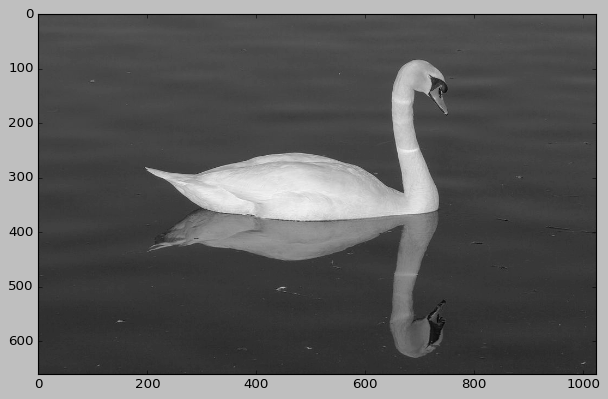

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FEAF9C63610>


In [ ]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [ ]:
U.shape

(660, 660)

In [ ]:
V.shape

(1024, 1024)

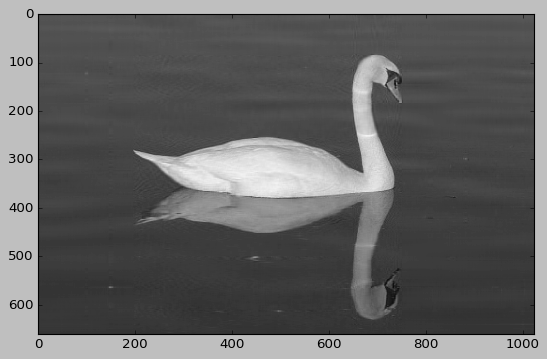

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 60
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[21. 32. 22. ... 25. 27. 27.]


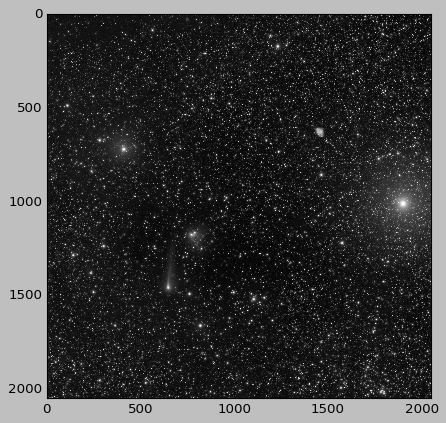

<PIL.Image.Image image mode=LA size=2048x2048 at 0x7FEAF8163C50>


In [ ]:
#imagen 1
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://apod.nasa.gov/apod/image/2110/67p_m1_vdb47.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

U,D,V = np.linalg.svd(imgmat)


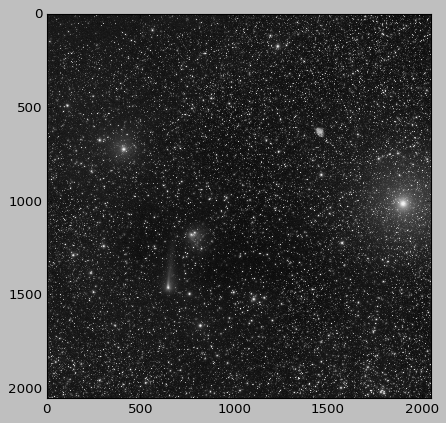

Felicidades la imagen está comprimida


In [ ]:
nvalue = 1000
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
# Para esta imagen como tiene componentes de alta frecuencia
# tenemos que usar mucho más componentes

[144. 144. 144. ... 196. 196. 197.]


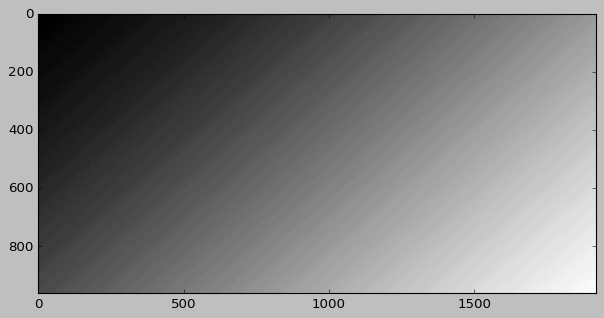

<PIL.Image.Image image mode=LA size=1920x960 at 0x7FEAF7E62090>


In [ ]:
#imagen 2
# Para este caso quiero usar una imagen con frecuencias espaciales bajas
# mi hipótesis es que con muy pocos componentes puedo recontruirla a diferencia de la anterior

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://mir-s3-cdn-cf.behance.net/project_modules/fs/4d63ac64120315.5ac773360206a.png')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

U,D,V = np.linalg.svd(imgmat)


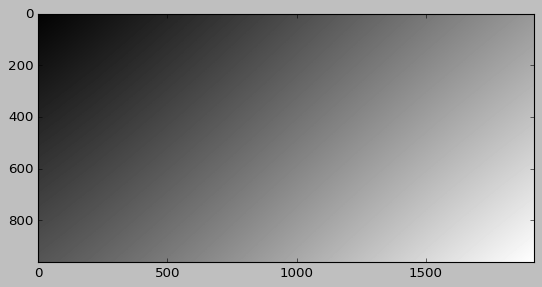

In [ ]:
nvalue = 1
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()

# En efecto, esta imagen con muy pocos componentes se puede reconstruir

[ 43.  18. 134. ... 177. 138.  93.]


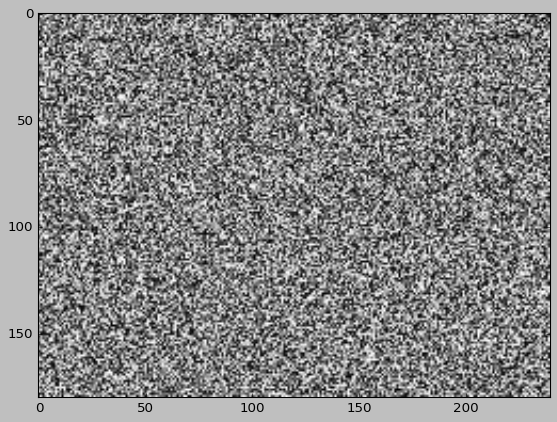

<PIL.Image.Image image mode=LA size=240x180 at 0x7FEAF7E95050>


In [ ]:
#imagen 3
# Para este caso voy a usar una imagen de ruido blanco. Esta imagen tiene máxima variabilidad y 
# mi hipótesis es que necesite muchísimos componentes para poderla representar
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/f/f6/White-noise-mv255-240x180.png')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

U,D,V = np.linalg.svd(imgmat)


(180, 240)


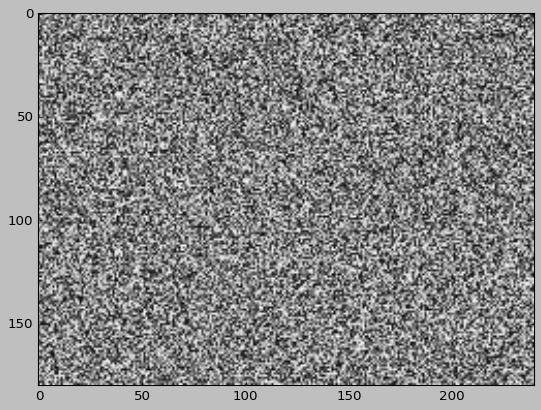

In [ ]:
print(imgmat.shape)
nvalue = 170
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()

# En efecto, para esta imagen tengo que usar 170 de 180 componentes para poder 
# hacer una reconstrucción adecuada.

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [21]:
#tu codigo aqui
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Load the data
iris = datasets.load_iris()
X = iris.data
y = pd.DataFrame(iris.target)
y.columns = ['class']
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.columns = ['sepal lengt', 'sepal width', 'petal length', 'petal width']

# Hacemos la descomposición en componentes principales
pca = PCA(n_components=4)
pca.fit(X)
# Ahora crearemos una tabla con los valores de varianza y varianza acumulada de cada componente
# La idea es ver claramente cuantos componentes podemos que contengan la mayor parte de la variabilidad de los
# datos originales.

pcsSummary = pd.DataFrame({'Desviación Estandard': np.sqrt(pca.explained_variance_),
                          'Varianza': pca.explained_variance_ratio_,
                          'Varianza acumulada': np.cumsum(pca.explained_variance_ratio_),
                          'Varianza perdida': 1 - np.cumsum(pca.explained_variance_ratio_) 
                          }
                          )
pcsSummary
pcsSummary_df = pcsSummary

#pcsSummary_df['PC']= ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]

row_names = np.array(['PC{}'.format(i) for i in range(1, 4 + 1)])
pcsSummary.index = row_names
pcsSummary.round(4)


#X_new = pca.fit_transform(X) # project the original data into the PCA space





,Desviación Estandard,Varianza,Varianza acumulada,Varianza perdida
PC1,1.7141,0.7296,0.7296,0.2704
PC2,0.9593,0.2285,0.9581,0.0419
PC3,0.3844,0.0367,0.9948,0.0052
PC4,0.1444,0.0052,1.0000,0.0000


In [ ]:
# Aquí podemos ver que los dos primeros componentes contienen más del 95% de
# toda la variabilidad del set de datos original

In [ ]:
# Tambien podemos proyectar los features originales en los eigenvectores y ver su contribución 

In [31]:
pcaDecom = pd.DataFrame(pca.components_, columns=X.columns)
pcaDecom.insert(loc=0,column='PC',value=range(1, 4 + 1))
pcaDecom

,PC,sepal lengt,sepal width,petal length,petal width
0,1,0.521066,-0.269347,0.580413,0.564857
1,2,0.377418,0.923296,0.024492,0.066942
2,3,-0.719566,0.244382,0.142126,0.634273
3,4,-0.261286,0.123510,0.801449,-0.523597


In [ ]:
# Para el primer Componente Princial, los features que más contribuyen son
# 1 Sepal length
# 2 petal length
# 3 petal width

# Por otro lado el segundo componente principal tiene una contribución dominadapor Sepal width.

#### ¿Qué es feature importance y para que nos sirve?

El *feature importance* nos permite entender la contribución de cada *feature* en los eigenvectores. Entre más cercano a uno sea el valor del *feauture* más peso tiene en el componente principal.

#### ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?
Lo más interesante que encontré es que con tan solo con los dos primeros Componentes Principales podemos conservar más del 95% de la variabilidad de los datos para el conjunto que usamos.


#### ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?
PCA lo podemos usar para entender mejor que features contribuyen más en la variabilidad de los datos. Esto toma relevancia en conjuntos de datos muy grandes en donde el costo coputacional de entrenar algún modelo es alto, en la mayoría de los modelos el costo computacional no es lineal al aumentar el número de *features*, si podemos reducir el número de dimensiones a costa de un pequeño costo de variabilidad generalmente es una buena desición porque esta reducción nos permitirá usar modelos más complejos.

PCA también nos sirve para vizualizar datos multidimensionales en un espacio de 2 o 3 dimensiones. 